***
***
***

<br><h2>Code To Analyze Groups With Highest Users' Weekly Logins</h2>
<h4>02/11/2020 | UMBA Product/Analyst Homework</h4>
Maya Anne - Hopefully Future Product Analyst Intern :)<br><br><br>

***
***
***

<h3>Code explanation</h3><br>

This code is intended to identify which group of users have the highest login activities along with the reasons causing this level of activity. Along with the report analysis provided, this code has for goal to understand what drives users activity and what can Umba do to increase its users activity with the platform. 
Please note that in order to run this code, the file 'weekly_logins.csv' must be located in the directory of Jupyter Notebook.  

In [1]:
#import the necessary packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#Read the csv file
df = pd.read_csv('weekly_logins.csv')
df


,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,Tammy Martin,No,/tool/storyboard,No,39,3,Zoom Video Communications,Technology,$100M - $500M,West,No,No,Yes,No,/quora,142.93.8.33,14,Yes,No
1714,Irene Scott,No,/tool/storyboard,No,39,4,Zoom Video Communications,Technology,$100M - $500M,West,Yes,No,Yes,Yes,/google.com,165.227.215.62,13,No,Yes
1715,Candelaria Hill,No,/home,No,169,1,Zoom Video Communications,Technology,$100M - $500M,West,No,No,Yes,Yes,zoom.com,192.200.200.99,14,No,No
1716,Loretta Sanders,Yes,/tool/storyboard,Yes,169,10,Zoom Video Communications,Technology,$100M - $500M,West,No,No,No,No,/tripadvisor.com,67.205.132.241,13,Yes,No


In [2]:
#inspect weekly logins column
print(df['Weekly Logins'].max())
print(df['Weekly Logins'].min())
print(df['Weekly Logins'].mean())
print(np.percentile(df['Weekly Logins'], 75))


17
0
6.065774155995343
8.0


In [3]:
#Create a dataframe only with users located above the mean 
df2 = []

for index, row in df.iterrows():
    if df.loc[index, 'Weekly Logins'] > df['Weekly Logins'].mean(): 
        df2.append(row)

        
logins = pd.DataFrame(df2)  
logins.reset_index(drop=True, inplace=True) 

#Print the dataframe for inspection
logins

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes
1,Chadwick Miller,Yes,/tool/storyboard,Yes,39,16,HP,Technology,>$10B,West,No,No,No,Yes,/mail.google.com,138.68.41.90,6,Yes,Yes
2,David Watson,Yes,/tool/storyboard,Yes,39,10,HP,Technology,>$10B,West,Yes,No,Yes,No,/google.com,138.68.240.218,6,Yes,Yes
3,Jack Hang,Yes,/tool/storyboard,Yes,39,10,HP,Technology,>$10B,West,No,Yes,Yes,Yes,zoom.com,72.35.40.34,4,No,Yes
4,Stella Reynolds,No,/tool/storyboard,Yes,169,14,HP,Technology,>$10B,West,No,No,No,Yes,/facebook.com,138.197.222.35,7,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Lee Hanberry,Yes,/tool/storyboard,Yes,39,7,Zoom Video Communications,Technology,$100M - $500M,West,No,Yes,No,Yes,/tripadvisor.com,165.227.215.62,15,Yes,Yes
559,Luz Hall,Yes,/tool/storyboard,Yes,39,8,Zoom Video Communications,Technology,$100M - $500M,West,Yes,No,Yes,No,/tripadvisor.com,192.200.200.99,6,Yes,No
560,Vanessa Gaskins,No,/tool/storyboard,Yes,39,7,Zoom Video Communications,Technology,$100M - $500M,West,No,Yes,Yes,No,/tripadvisor.com,162.243.107.120,6,No,Yes
561,Shana Warne,Yes,/tool/storyboard,Yes,169,15,Zoom Video Communications,Technology,$100M - $500M,West,No,Yes,Yes,Yes,zoom.com,72.35.40.34,15,No,No


In [4]:
#Save logins as an excel file 
#logins.to_excel('User Group with High Weekly Logins.xlsx', index = False)


In [5]:
#Drop uncessary column 
logins_df = logins.drop(["User Name"], axis=1)


In [6]:
#Renaming columns
logins_df.rename(columns = {'Slack Integration':'slack_integration', 'Most Used Page':'most_used_page', 
                              'Had Free Trial':'had_free_trial', 'User MRR':'user_mrr', 
                              'Weekly Logins':'weekly_logins', 'Company Name':'company_name', 
                              'Industry':'industry', 'Company Size':'company_size',
                              'Territory':'territory', 'Sales Call in Trial':'sales_call_in_trial',
                              'Zendesk Integration':'zendesk_integration', 'Salesforce Integration':'salesforce_integration',
                              'Gmail Integration':'gmail_integration', 'Most common referrer':'most_common_referrer',
                              'Most common IP':'most_common_ip', 'Sales Touches to Close':'sales_touches_to_close',
                              'Used Admin Panel':'used_admin_panel', 'Has Issued Support Request':'has_issued_support_request'}, inplace = True)



In [7]:
#Exploratory data analysis to uncover patterns & trends in the data 

logins.describe().round(2)

,User MRR,Weekly Logins,Sales Touches to Close
count,563.00,563.00,563.00
mean,201.33,10.68,9.99
std,355.64,2.88,3.83
min,39.00,7.00,4.00
25%,39.00,8.00,7.00
50%,39.00,10.00,10.00
75%,169.00,13.00,13.00
max,1299.00,17.00,16.00


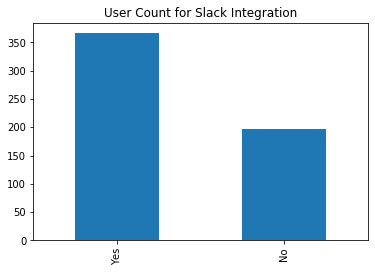

In [8]:
#Display distplot of variables 
logins_df.slack_integration.value_counts().plot(kind='bar', title = 'User Count for Slack Integration')


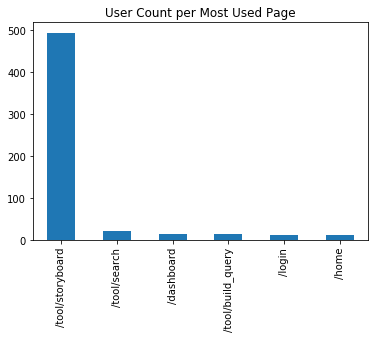

In [9]:
#Display distplot of variables 
logins_df.most_used_page.value_counts().plot(kind='bar', title = 'User Count per Most Used Page')


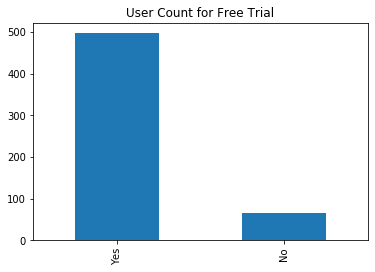

In [10]:
#Display distplot of variables 
logins_df.had_free_trial.value_counts().plot(kind='bar', title='User Count for Free Trial')


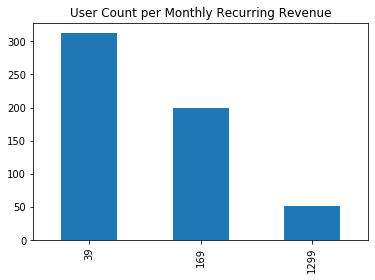

In [11]:
#Display distplot of variables 
logins_df.user_mrr.value_counts().plot(kind='bar', title = 'User Count per Monthly Recurring Revenue')




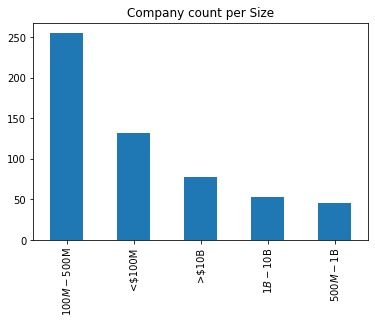

In [12]:
#Display distplot of variables 
logins_df.company_size.value_counts().plot(kind='bar', title = 'Company count per Size')


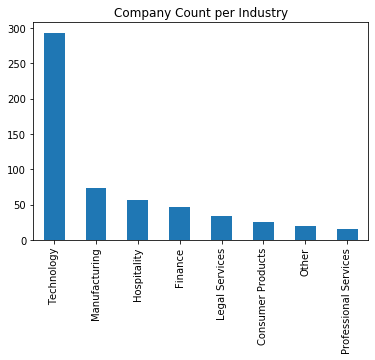

In [13]:
#Display distplot of variables 
logins_df.industry.value_counts().plot(kind='bar', title = 'Company Count per Industry')
